<hr size="4" color="blue">
<p style="text-align: center;"><span style="color: #0000ff;"><font size="+5"><strong>Saisonnalité</strong> </font></span> </p>
<hr size="4" color="blue">

# Import

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [389]:
Names=['Times','Pression']
Type ={'Pression': float}#,dtype=Type
# Données avec tout les effets + effet
dfSimu=pd.read_csv('Data/Simulate/Simulated.csv',header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)
# Données avec saisonnalité uniquement
dfSea=pd.read_csv('Data/Simulate/SimulatedSeasonality.csv',dtype=Type,header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)
# Données stationnaire
dfsta=pd.read_csv('Data/Simulate/SimulatedStationnaire.csv',header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)
# Donnes avec une tendance
dfTrend=pd.read_csv('Data/Simulate/SimulatedTrend.csv',dtype=Type,header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)
#Donnees avec trend and saisonalité
dfTrendSais=pd.read_csv('Data/Simulate/SimulatedTrendSaisonality.csv',dtype=Type,header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)


In [390]:
#Donnees avec trend and saisonalité
dfSinus=pd.read_csv('Data/Simulate/SimulatedSinus.csv',dtype=Type,header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)


frequence 3.472222222222222e-05
retard :  25920000 s


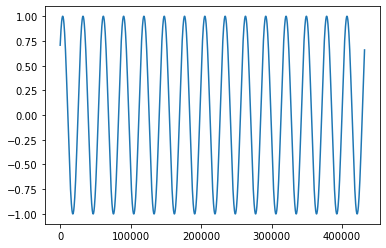

In [447]:
PeriodeRef=3600*24 #seconde
CycleParPeriode=3
Te=5*60 # seconde
Ne= 5*int(PeriodeRef/Te)
time=np.arange(Ne*Te,step=Te)
Fr=CycleParPeriode/PeriodeRef
print('frequence',Fr)
Delay=3600*24#s
phase=Delay*Te#*(2*np.pi*Fr)
seasonality=np.sin(Fr*2*np.pi*time+phase)
plt.plot(time,seasonality)
dt=Ne/time.shape[0]*Te
TT=int(1/(Fr*dt))#
print('retard : ',phase,'s')

In [392]:
dfSinus=pd.DataFrame(seasonality,index=time)

# 1) Définition

<div style="border: 2px solid #1EF223; padding: 3px; background-color: #DEFFCD; -moz-border-radius-topleft: 5px; -moz-border-radius-topright: 5px; -moz-border-radius-bottomright: 5px; -moz-border-radius-bottomleft: 5px;">



On parle de composante périodique lorsque la série (xt)1≤t≤n peut se décomposer en :
$$x_t = s_t +T_t+ ǫ_t$$
où 
$1 ≤ t ≤ n$,et $s_t% est périodique, c’est-à-dire $s_{t+T} = s_t, avec $T$ la période (supposée entière).

Lorsque la période est de 6 mois ou 1 an, on parle généralement de composante saisonnière.
Enfin, il est fréquent qu’une série comporte à la fois une tendance et une composante périodique (cf. exemple 2).

L’étude de la saisonnalité est un préalable au traitement d’une série chronologique. En effet, lorsque cette composante existe, il convient de l’isoler afin de pouvoir analyser les autres caractéristiques. Une désaisonnalisation systématique, sans tester l’existence de cette composante, peut créer un « bruit » parasite nuisible à l’analyse de la chronique et donc dégrader la qualité de la prévision. Dans ce chapitre, nous allons, par conséquent, présenter les techniques permettant de tester l’existence d’une composante saisonnière, puis nous examinons les méthodes de désaisonnalisation.

# 2) Estimation de la saisonnalité

De nombreuses séries présentent des comportements périodiques, rendant difficile la comparaison de deux instants successifs. On fait alors appel à une ***désaisonnalisation*** permettant d'obtenir des séries dites corrigées des variations saisonnières.
par exemple à l’aide de la régression linéaire ou de moyennes mobiles.

## 2.1) Utiliser des moyennes mobiles .... Encore

L'idée consiste à appliquer une ou plusieurs moyennes mobiles afin de mettre en évidence, estimer, les différentes composantes d'une série temporelle.
Supposons que :


$ X_t=T_t+S_t+ε_t $

Si on applique une moyenne mobile M sur la série, nous obtenons (grâce à la propriété d'associativité) :

$MXt=MTt+MSt+Mεt$.

La visualisation de la série nous permet d'émettre des hypothèses sur la tendance (linéaire, quadratique, etc.) et la saisonnalité (période, forme, etc.).

L'enjeu est de trouver une moyenne mobile qui laisse la tendance invariante $ M T_t= T_t$ , qui absorbe la saisonnalité $ M S_t=0$  et qui réduit le résidu : $ M \epsilon_t$ faible.

Dans ces conditions $MX_t$
constitue une estimation de la tendance. La saisonnalité peut ensuite être estimée en travaillant sur la différence entre la série et la tendance ainsi estimée.

https://openclassrooms.com/fr/courses/4525371-analysez-et-modelisez-des-series-temporelles/4811466-tp-desaisonnalisez-a-laide-de-la-regression-lineaire

Les méthodes couramment employées pour désaisonnaliser une série temporelle sont la régression linéaire et les filtres moyennes mobiles qu'on retrouve dans des algorithmes tels que Tramo-Seats et la famille des Xnum (dont X11 que nous verrons ensuite) ou Xnum-ARIMA.



On souhaite désaisonnaliser la série temporelle airpass à l'aide de la régression linéaire.

On créé à cet effet les bases tendancielle et saisonnière :

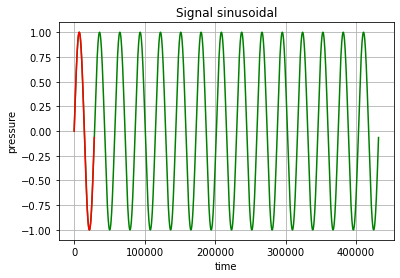

In [157]:
fig, ax = plt.subplots()
ax.plot(time, seasonality,'g')
ax.plot(time[:TT], seasonality[:TT],'r')

ax.set(xlabel='time', ylabel='pressure',
       title='Signal sinusoidal')
ax.grid()

fig.savefig("SinusoidalSignal.png")
plt.show()

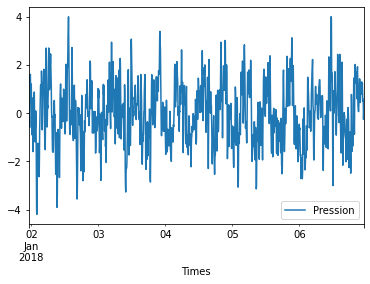

In [180]:
%matplotlib inline
dfSea.plot()
plt.savefig("plotSaisonnalite.png")

<AxesSubplot:xlabel='Times'>

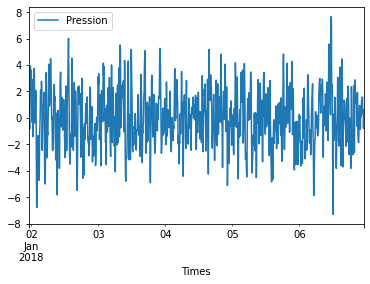

In [181]:
dfsta.plot()

<AxesSubplot:xlabel='Times'>

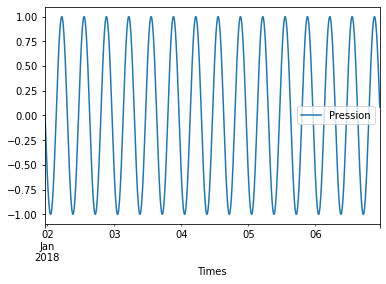

In [160]:
dfSinus.plot()

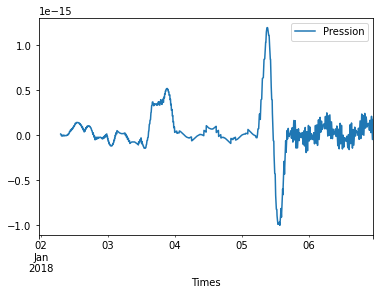

In [161]:
df=dfSinus.rolling(96).mean()
df.plot()
plt.savefig("plotResiduSinus_MM.png")

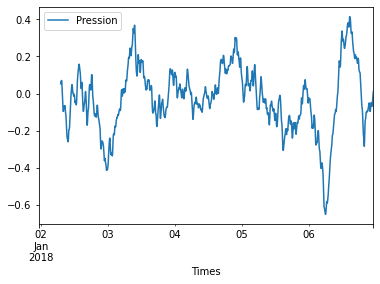

In [182]:
df=dfSea.rolling(96).mean()
df.plot()
plt.savefig("plotResiduSeasonality_MM.png")

In [196]:
df=dfSea.rolling(15
0).mean()

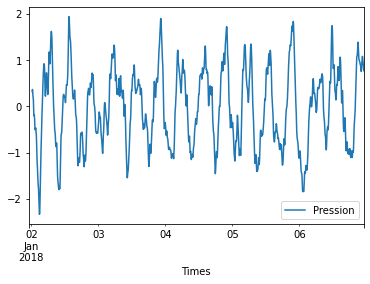

In [197]:

df.plot()
plt.savefig("plotSeasonality_MM.png")

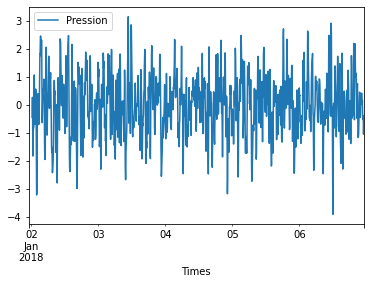

In [198]:
dd=dfSea-df
dd.plot()
plt.savefig('plotData_MM_desaisonnalite')

<AxesSubplot:xlabel='Times'>

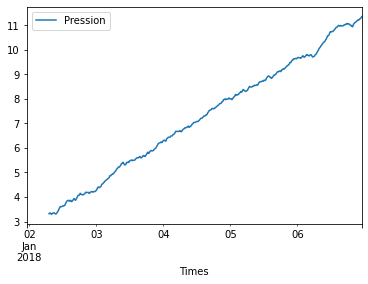

In [95]:
dfTr=dfTrendSais.rolling(96).mean()
dfTr.plot()

In [5]:
dfS=dfTrendSais-dfTr

In [6]:
dfS.plot()

<AxesSubplot:xlabel='Times'>

# Tester la présence d'une saisonnalité

https://www.statsmodels.org/devel/generated/statsmodels.tsa.stattools.acf.html

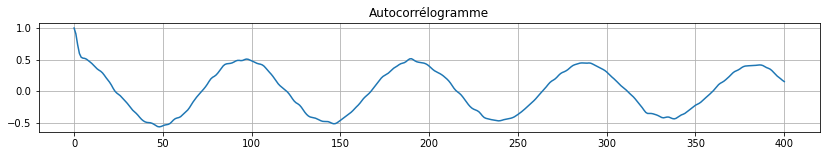

In [97]:
from statsmodels.tsa.stattools import acf
cor = acf(dfSea.values,nlags=400)
fig, ax = plt.subplots(1, 1, figsize=(14,2))
ax.plot(cor)
ax.set_title("Autocorrélogramme");
plt.grid()

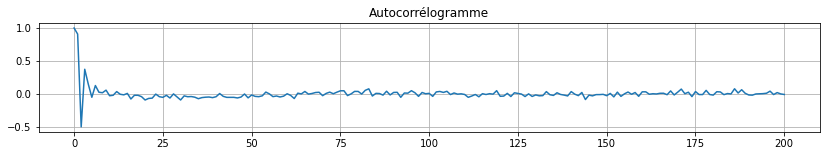

In [101]:
from statsmodels.tsa.stattools import pacf
cor = pacf(dfSea.values,nlags=200)
fig, ax = plt.subplots(1, 1, figsize=(14,2))
ax.plot(cor)
ax.set_title("Autocorrélogramme");
plt.grid()

La première saisonalité apparaît,100*300 =30000 seconde soit 8h20 , 180*300 =
Les autocorrélations partielles confirment cela.

https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.pacf.html

In [200]:
%matplotlib inline

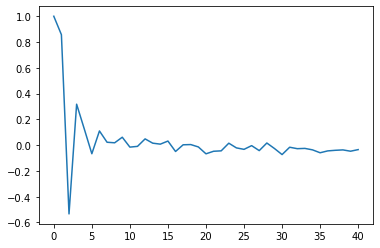

In [201]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
#plot_pacf(dfSea.values, lags=400,method='ywm')
corp=pacf(dfSea.values, nlags=40,method='ywm')
plt.plot(corp)

<AxesSubplot:xlabel='Times'>

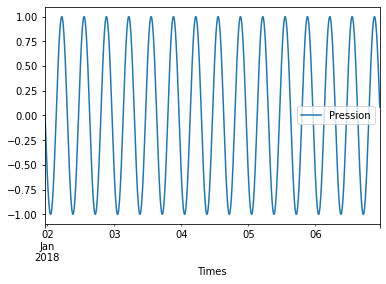

In [211]:
dfSinus.plot()

/home/ggassier/.conda/envs/GerinatEnvConda/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


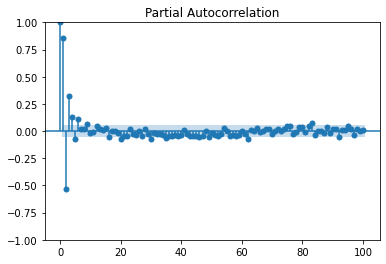

In [233]:
sm.graphics.tsa.plot_pacf(dfSea, lags=100)
plt.savefig("plot_ACF_saisoniere.png")
plt.show()

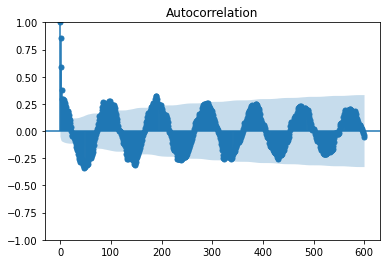

In [231]:
sm.graphics.tsa.plot_acf(dfSea, lags=600)
plt.savefig("ACF_saisoniere.png")
plt.show()

Question : Déterminer la fréquence et la phase/ retard d'une série temporelle.


## 2.2) Estimation de la fréquence par le spectrogramme

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.periodogram.html

In [393]:
duration=dfSea.index[1]-dfSea.index[0]
Te=duration.seconds

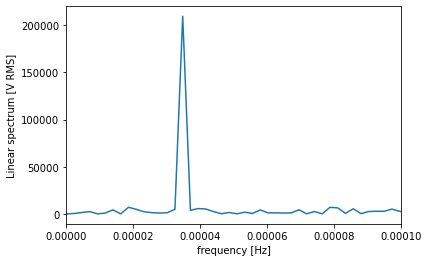

In [394]:
Fe=1/Te
from scipy import signal
f, Pxx_den = signal.periodogram(dfSea.values[:,0],Fe)
plt.plot(f,Pxx_den)
plt.xlim([0,0.0001])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()


##plt.scatter([Fr],[0])

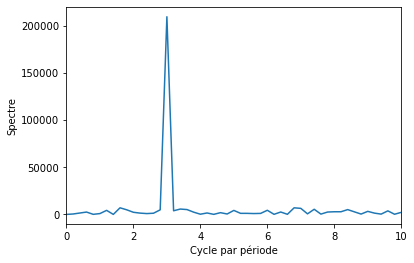

<Figure size 432x288 with 0 Axes>

In [441]:
Fe=1/Te
from scipy import signal
f, Pxx_den = signal.periodogram(dfSea.values[:,0],Fe)
plt.plot(f*PeriodeRef,Pxx_den)
plt.xlim([0,10])
plt.xlabel('Cycle par période')
plt.ylabel('Spectre')
plt.show()
plt.savefig('plot_fft_seasonality.png')

In [396]:
Fr=f[np.argmax(Pxx_den)]
ECycle=Fr*PeriodeRef
print(ECycle)

3.0


***Interprétation***

## 2.3) Estimation de la  phase/retard par la fft

In [407]:
PHA

0.04363323129986019

In [398]:
time=dfSea.index

In [408]:
Sea=seasonality

reel : 288.0

Estimation affiner: 0.044
1320094.7599814166


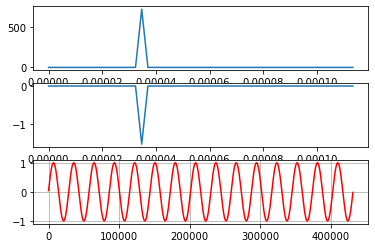

In [442]:
amp = np.fft.rfft(Sea)#+np.pi/2
freqs = np.fft.rfftfreq(time.shape[-1],dt)
mag=np.abs(amp)
pha=np.angle(amp)
print('reel : '+str(np.around(phase,3))+'\n')
IndFR=np.argmax(mag)
Pe=np.pi
PHA=pha[IndFR]
PhaMod=PHA%Pe
PhaDiv=int(PHA//Pe)
PHA=PhaMod+PhaDiv*np.pi+np.pi/2
#print (PHA)
print('Estimation affiner: '+str(np.around(PHA,3)))

M=max(mag)
phaPlot=pha
phaPlot[np.abs(mag) < M-1] = 0
DelayEst=phase/(2*np.pi*Fr)
print(DelayEst)
plt.subplot(311)
plt.plot(freqs[:50],mag[:50])
plt.subplot(312)
plt.plot(freqs[:50],phaPlot[:50])
plt.subplot(313)
#plt.plot(time, seasonality,'g')
plt.plot(time,Sea,'r')
plt.grid()
plt.show()

In [443]:
PP=(pha%Pe)+(pha//Pe).astype(int)*np.pi+np.pi/2

In [444]:
phase

288.0

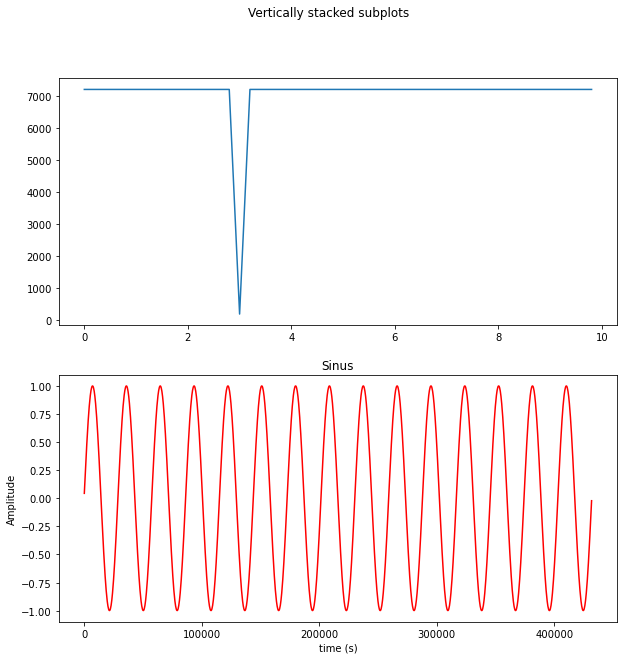

In [445]:
fig, axs = plt.subplots(2,figsize=(10,10))
fig.suptitle('Vertically stacked subplots')
axs[0].plot(freqs[:50]*PeriodeRef,PP[:50]/(2*np.pi*Fr))

axs[1].plot(time,Sea,'r')
axs[1].set(xlabel='time (s)', ylabel='Amplitude',
       title='Sinus')
ax.grid()



## 2.4) Estimation des paramètres saisonnier par regressions


### Filtrage

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html

In [16]:
from scipy import signal

<AxesSubplot:xlabel='Times'>

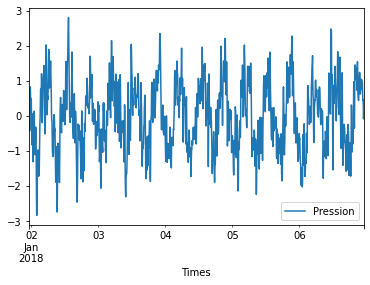

In [28]:
dfSea.plot()

In [450]:
sig=dfSea.values[:,0]
sig.shape

(1440,)

In [451]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def butter_lowpass(cutoff, fs, order=15):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filtfilt(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

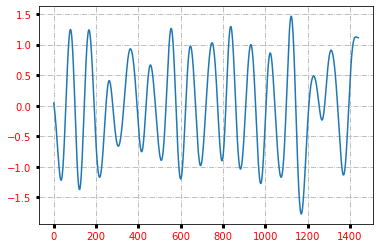

In [454]:
cutoff =5
fs = Te
filtered= butter_lowpass_filtfilt(sig, cutoff, fs)
fig, ax = plt.subplots()
ax.plot(filtered)
ax.grid(True, linestyle='-.')
ax.tick_params(labelcolor='r', labelsize='medium', width=3)
plt.savefig('plot_filtered_seasonality.png')
plt.show()

In [21]:
ft=3.472222222222222e-05

### Ajustement sur un sinus

L ajustement est possible si on contraint les paramètres...

[2.50000000e+00 5.25895906e-05 4.32578253e-02]


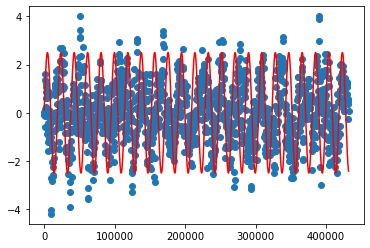

In [460]:
bounds=([2.5,0,0],[3,0.0001,2*np.pi])

from scipy.optimize import curve_fit
PeriodeRef=3600*24 #seconde
CycleParPeriode=3
Te=5*60 # seconde
Ne= 5*int(PeriodeRef/Te)
def func(x, a, f, ph):
    return a*np.sin(f*2*np.pi*x+ph)
x=np.arange(Ne*Te,step=Te)
#x=np.arange(Ne)
yn =filtered#dfSea.values[:,0]
popt, pcov = curve_fit(func, x, yn,bounds=bounds)#, sigma = y_sigma)
a, f,ph= popt
print(popt)
# plot input vs output
plt.scatter(x, sig)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x),step=1)
# calculate the output for the range
y_line = func(x_line, a, f,ph)
# create a line plot for the mapping function
plt.plot(x_line, y_line , color='red')
plt.show()

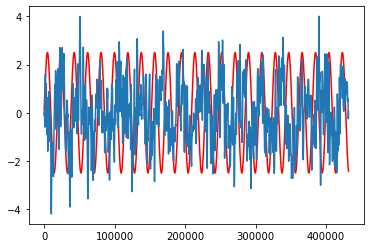

array([2.50000000e+00, 5.25895906e-05, 4.32578253e-02])

In [457]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax.errorbar(x, yn, yerr = y_sigma, fmt = 'o')
ax1.plot(x_line, y_line , color='red')
ax1.plot(x, sig)
plt.savefig('plot_regession_cos_seasonality.png')
plt.show()
popt

In [24]:
popt

array([2.50000000e+00, 5.25831197e-05, 3.62365369e-05])